# Cleaning and Analyzing Employee Exit Surveys

In this project we'll work with exit surveys from employees of the Department of Education Training an Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

### The Goal
In this analysis we want to answer two questions:

- Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction?
- What about employees who have been there longer?
- Are younger emplyees resigning due to some kind of dissatisfaction?
- What about older employees?

### The datasets
The DETE dataset was made available thanks to the Queensland government, and can be downloaded from here. The original TAFE exit survey data is no longer available. The dataset I've used in this project is provided by the Dataquest team. Both datasets have been modified slightly to make the easier to work with, including changing the encoding to UTF-8.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by reading the file and getting some initial information from it.

In [2]:
dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

In [3]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE dataset is composed of 822 entries, each with 56 different columns. No dictionary was provided with the dataset, but the relevany columns to answer our questions seem to be:

| Name	| Type	| Description|
|:-------|:-------|:---|
|ID	|Numeric	|A unique participant identifier|
|SeparationType	|Categorical	|The reason for the person's termination of employment|
|Cease Date	|string	|Year and month of the person's termination of employment|
|DETE Start Date	|string	|Year the person's DETE employment began|
|Job dissatisfaction	|boolean	|Did the person's employment end due to job dissatisfaction|
|Dissatisfaction with the department	|boolean	|Did the person's employment end due to dissatisfaction with the department|
|Physical work environment	|boolean	|Did the person's employment end due to issues with the physical work environment|
|Lack of recognition	|boolean	|Did the person's employment end due to lack of recognition|
|Lack of job security	|boolean	|Did the person's employment end due to lack of job security|
|Work location	|boolean	|Did the person's employment end due to issues with the work's location|
|Employment conditions	|boolean	|Did the person's employment end due to issues with the employment conditions|
|Work life balance	|boolean	|Did the person's employment end due to issues with the company's work-life balance|
|Workload	|boolean	|Did the person's employment end due to issues with the workload|
|Age	|categorical	|The person's age bracket at the time of filling the survey|

Let's look for missing values in the relevant columns we've identified above:

In [5]:
dete_relevant_cols = ['ID', 'SeparationType',
                      'Cease Date', 'DETE Start Date',
                      'Job dissatisfaction',
                      'Dissatisfaction with the department',
                      'Physical work environment',
                      'Lack of recognition',
                      'Lack of job security',
                      'Work location',
                      'Employment conditions',
                      'Work life balance',
                      'Workload', 'Age']
dete[dete_relevant_cols].isnull().sum()

ID                                      0
SeparationType                          0
Cease Date                              0
DETE Start Date                         0
Job dissatisfaction                     0
Dissatisfaction with the department     0
Physical work environment               0
Lack of recognition                     0
Lack of job security                    0
Work location                           0
Employment conditions                   0
Work life balance                       0
Workload                                0
Age                                    11
dtype: int64

It looks like there are no missing entries in the relevant DETE columns, but if we take a closer look at some of the columns we'll see that they contain a 'Not Stated' value when values are missing. For example, let's look at the `Cease date`:

In [6]:
dete['Cease Date'].value_counts()

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: count, dtype: int64

Now, let's do the same for the TAFE survey:

In [7]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The TAFE dataset is composed of 702 entries, each with 72 different columns. Again, no dictionary was provided with the dataset, so we'll need to use common sense to identify the meaning of each column. These are the relevant columns:

|Name|Type|Description|
|:--|:--|:--|
|Record ID|Numeric|A unique participant identifier|
|CESSATION YEAR|numerical|Year of the person's termination of employment|
|Reason for ceasing employment	|categorical	|The reason for the person's termination of employment|
|Contributing Factors. Dissatisfaction	|categorical	|Did the person's employment end due to dissatisfaction|
|Contributing Factors. Job Dissatisfaction	|categorical	|Did the person's employment end due to job dissatisfaction|
|CurrentAge. Current Age	|categorical|	The person's age bracket at the time of filling the survey|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)	|categorical	|Bracket of overall Length of Service at Institute (in years)|

Let's look for missing values in the relevant columns we've identified above:

In [9]:
tafe_relevant_cols = ['Record ID',
                      'CESSATION YEAR',
                      'Reason for ceasing employment',
                      'Contributing Factors. Dissatisfaction',
                      'Contributing Factors. Job Dissatisfaction',
                      'CurrentAge. Current Age',
                      'LengthofServiceOverall. Overall Length of Service at Institute (in years)']

tafe[tafe_relevant_cols].isnull().sum()

Record ID                                                                      0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
CurrentAge. Current Age                                                      106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
dtype: int64

Unlike the DETE survey, the missing values here are proper 'NaN' values. There's quite a few of them, however, since we're only interested in employments that ended due to **resignation**, let's remove all the entries that aren't due to resignation, and check again:

In [10]:
tafe[tafe['Reason for ceasing employment'] == 'Resignation'][tafe_relevant_cols].isnull().sum()

Record ID                                                                     0
CESSATION YEAR                                                                5
Reason for ceasing employment                                                 0
Contributing Factors. Dissatisfaction                                         8
Contributing Factors. Job Dissatisfaction                                     8
CurrentAge. Current Age                                                      50
LengthofServiceOverall. Overall Length of Service at Institute (in years)    50
dtype: int64

Okay, there's significantly less missing values for these entries, but we still need to handle them.

## Data Cleaning

Next, we'll clean and combine both datasets into one easy-to-work-with dataset. We'll need to change the 'Not Stated' values in the DETE survey to proper NaNs, get rid of irrelevant columns and merge columns from both surveys that have similar data, but with different names/categories.

In [11]:
# Re-reading the DETE survey CSV file again, this time reading the 'Not Stated' values as NaN:
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Dropping the immediately irrelevant columns from both data frames:
dete_updated = dete.drop(dete.columns[28:49], axis=1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

# Standardizing the columns names, to let us combine both datasets
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('separationtype', 'separation_type')
dete_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
# Renaming the TAFE survey columns to match the DETE survey ones
tafe_cols_remane = {
    'Record ID': 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment' : 'separation_type',
    'Gender. What is your Gender?' : 'gender',
    'CurrentAge. Current Age' : 'age',
    'Employment Type. Employment Type' : 'employment_status',
    'Classification. Classification' : 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)' : 'role_service'
}

tafe_updated = tafe_updated.rename(tafe_cols_remane, axis=1)
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filtering

Since we're only interested in employees who resigned, let's filter out all other separation reasons.

'dete_resignations' will hold only the DETE entries where the separation was due to resignation:

In [13]:
dete_updated['separation_type'].value_counts()

separation_type
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [14]:
dete_resignation = ['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']
dete_resignation = dete_updated.copy()[dete_updated['separation_type'].isin(dete_resignation)]

Similarly, 'tafe_resignations' will hold the TAFE resignation entries:

In [15]:
tafe_updated['separation_type'].value_counts()

separation_type
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [16]:
tafe_resignation = tafe_updated[tafe_updated['separation_type'] == 'Resignation']

## Data Verification

We'll run some sanity tests, to make sure that the majority of the data is valid. Starting with the DETE start and end years, let's make sure that the end date is no later than the current date and that the start date isn't too far in the past.

In [17]:
dete_resignation['dete_start_date'].value_counts().sort_index()

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [18]:
dete_cease_year = dete_resignation['cease_date'].str.split('/').str.get(-1).astype(float)
dete_cease_year.value_counts().sort_index()

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [19]:
tafe_resignation['cease_date'].value_counts().sort_index()

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

From the above we see that the years data is fine. All the year values are valid.

## Get the DETE years in service info

In [20]:
# TAFEer's years of service.
tafe_resignation['institute_service'].value_counts(dropna=False)

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

In [21]:
dete_resignation['institute_service'] = dete_cease_year - dete_resignation['dete_start_date']
dete_resignation['institute_service'].value_counts().sort_index()

institute_service
0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: count, dtype: int64

We've added a new column called 'institute_service' which holds the number of years in service for each person on the survey.

## Identifying Dissatisfied Employees

We'll use the columns we've already identified from each survey to categorise employees as dissatisfied:

**DETE survey**

- job_dissatisfaction

- dissatisfaction_with_the_department

- physical_work_environment

- lack_of_recognition

- lack_of_job_security

- work_location

- employment_conditions

- work_life_balance

- workload

**TAFE survey**

- Contributing Factors. Dissatisfaction

- Contributing Factors. Job Dissatisfaction

Let's create a "dissatisfied" column. If an employee indicated any of the above factors as contributing to their resignation, we'll mark them as dissatisfied. But first, to standardise the values, we'll convert the string values in tafe_resignations from strings to booleans:

In [22]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [23]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [24]:
# Converts string values to boolean, by this map:
# NaN -> np.nan
# '-' -> False
# Any other value -> True

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    return val != '-'

tafe_resignation_copy = tafe_resignation.copy()
tafe_resignation_copy[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignation_copy[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [25]:
tafe_resignation_copy['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
False    277
True      55
NaN        8
Name: count, dtype: int64

In [26]:
tafe_resignation_copy['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
False    270
True      62
NaN        8
Name: count, dtype: int64

Now we're ready to add the new column to each of the datasets:

In [27]:
dete_dissatisfaction_cols = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction',
                            'Contributing Factors. Job Dissatisfaction']

tafe_resignation_copy['dissatisfied'] = tafe_resignation_copy[tafe_dissatisfaction_cols].any(axis=1, skipna=False)
dete_resignation['dissatisfied'] = dete_resignation[dete_dissatisfaction_cols].any(axis=1, skipna=False)

## Combine the Data

As a last step before merging both datasets we'll add a column to each dataframe that will allow us to easily distinguish between the two:

In [28]:
dete_resignation['institute'] = 'DETE'
tafe_resignation_copy['institute'] = 'TAFE'

In [29]:
combined = pd.concat([dete_resignation, tafe_resignation_copy], ignore_index=True)
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


After combining the datasets we dropped all columns that have less than 500 non-null values. That action left us with only the columns that appear in both datasets, which are the columns we're interested in.

## Institute Service
Next, we want to clean the `institute_service` columns.

If we look at its values we can see they're all over the place, using a few different formats:

In [30]:
combined_updated['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0   

To analyze the data we'll put it into categories. The categories we'll use are are based on this article, but are slightly modified. They are:

- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

In [31]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service_years'] = combined_updated['institute_service'].str.extract('(\d+)').astype(float)

In [32]:
def year_to_categories(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 6:
        return 'Experienced'
    elif val < 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_category'] = combined_updated['institute_service_years'].apply(year_to_categories)
combined_updated['service_category'].value_counts(dropna=False)

service_category
New            193
Experienced    155
Veteran        142
NaN             88
Established     73
Name: count, dtype: int64

In the code above we used regular expressions to extract the first integer from each institute_service value, converted it from string to float and put in in the new column 'institute_service_years'. We then created a simple function that maps each year to its corresponding category, and used it to populate the new column 'service_cat'. Now we can run the required analyses on the combined dataset.

## Employee's Age

Let's move on to cleaniong the age column:

In [33]:
combined_updated['age'].value_counts()

age
51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

Looks like the TAFE and DETE surveys split the employees' ages into similar brackets (with one exception which we'll address later) - every 5 years between the ages 21 and 55 (or 60), one bracket for anyone older and one for anyone younger.

Since one of the surveys has a single bracket for anyone 56 or older, I'll merge both "56-60" and "61 or older" brackets into a single bracket, to make both datasets match.

In [34]:
age_brackets = {
    '56-60': '56 or older',
    '61 or older': '56 or older'
}

combined_updated['age'] = combined_updated['age'].str.replace('  ', '-').replace(age_brackets)

Now let's look again at the age brackets:

In [35]:
combined_updated['age'].value_counts(dropna=False)

age
41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
20 or younger    10
Name: count, dtype: int64

## Analysis
We'll start our analysis on the 'dissatisfied' column. Let's confirm the number of True and False in the column:

In [36]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    403
True     248
Name: count, dtype: int64

Now we can get the precentage of dissatisfied employees in each category. df.pivot_table() will by default get the mean of the values. Since True is considered to be 1 and False 0, we can simply call df.pivot_table() with 'dissatisfied' as the values column and 'service_cat' as the index column.

In [37]:
dissatisfaction_by_categories = combined_updated.pivot_table(index='service_category', values='dissatisfied')
dissatisfaction_by_categories

,dissatisfied
service_category,
Established,0.561644
Experienced,0.316129
New,0.295337
Veteran,0.471831


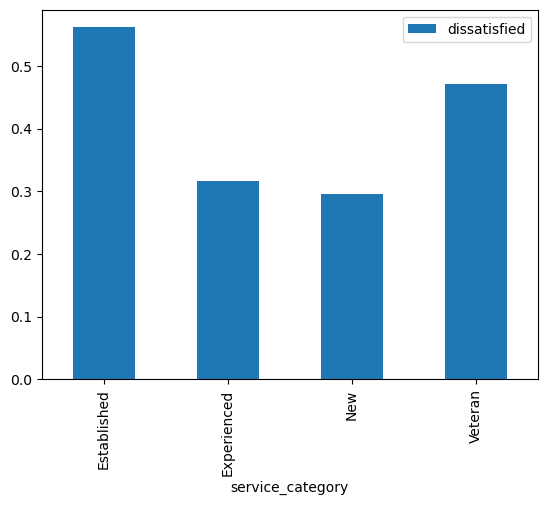

In [39]:
dissatisfaction_by_categories.plot(kind='bar')
plt.show()

Looking at the graph above we can clearly see that leaving due to dissatisfaction is lowest with new employees (< 1 year) with about 30% of the resignations being due to dissatisfaction, whereas for veterans (> 11 years) dissatisfaction accounts for almost 50% of the resignations.

Let's run a similar analysis, based on the employee's age bracket:

In [40]:
dissatisfaction_by_age = combined_updated.pivot_table(values='dissatisfied', index='age')
dissatisfaction_by_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56 or older,0.423077


<Axes: xlabel='age'>

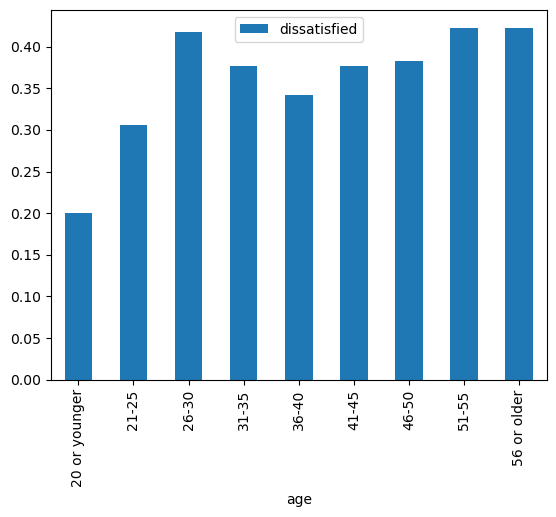

In [41]:
dissatisfaction_by_age.plot(kind='bar')

From the graph we can learn that younger employees are least likely to resign due to dissatisfaction. Starting from age 26 and above, dissatisfaction is becoming more prevalent, with about 35-40% of the resignations in these ages being sue to dissatisfaction.

## Conclusion
Organized and cleaned employee exit survey data from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
The following observations were made -

- Over 50% of employees with more than 7 years of experience noted job dissatisfaction as a reason for their resignation.
- Employees over 60 years of age were 52% more dissatisfied at the time of leaving compared to only 37% of employees between the age of 21-30.
- There was only a 4% difference in male(41%) versus female(37%) employees citing dissatisfaction as their primary reason.
- The dissatisfaction is more prevalent in the Department of Education, Training and Employment (DETE) with 49% of people resigning compared to only 28% of TAFE employees.
- Majority of employees that quit due to dissatisfaction worked in teaching jobs(including 'Teacher', 'Teacher Aide', 'Guidance Officer' and 'Tutor') and had been hired as permanent employees.

Based on the above findings, it is recommended that further survey be done on `experienced` and `veteran` employees in permanent teaching jobs to assess the reasons for employee dissatisfaction and what can be done to improve it.